In [1]:
! pip install pysftp matplotlib netCDF4
! pip install Cartopy folium Pillow

  Using cached contourpy-1.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 3.5 MB/s eta 0:00:0000:01
  Using cached kiwisolver-1.4.5-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 16.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.2 MB/s eta 0:00:0000:01:00:01
Using cached contourpy-1.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 64.5 MB/s eta 0:00:00:00:01
Using cached import

In [2]:
import os
import pysftp as sftp
import gzip
import shutil
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import numpy as np

In [3]:
keypath = ""
remote_file = "20180908_135354.nc.gz"
local_file = os.path.splitext(remote_file)[0]
local_destination = "/work/pi_mzink_umass_edu/SPRITE/UsableNotebooks/data/NETCDF_tmp"

local_path_zipped = os.path.join(local_destination, remote_file)  # because .gz
local_path = os.path.join(local_destination, local_file)
remote_path = os.path.join("/mnt/casa-ssd-pool/casa/qpe/20180908", remote_file)

NetCDFfromNAS_folder = "/work/pi_mzink_umass_edu/SPRITE/UsableNotebooks/NETCDF_tmp"

if not os.path.exists(NetCDFfromNAS_folder):
    os.makedirs(NetCDFfromNAS_folder)

In [3]:
cnopts = sftp.CnOpts()
cnopts.hostkeys = None
mysftp = sftp.Connection(host="", username="", private_key="", cnopts=cnopts)

In [4]:
# mysftp.cwd('/mnt/casa-ssd-pool/casa/qpe/20180908')
mysftp.get(remote_path, local_path_zipped)

In [5]:
with gzip.open(local_path_zipped, "rb") as f_in, open(local_path, "wb") as f_out:
    shutil.copyfileobj(f_in, f_out)

In [4]:
# Load data
nc_data = Dataset(local_path, "r")
rr_data = nc_data.variables["RRdata"][:]
x_data = nc_data.variables["x0"][:]
y_data = nc_data.variables["y0"][:]

In [8]:
print("\nVariables:")
for var_name, var in nc_data.variables.items():
    print(f"  Variable: {var_name}")
    print(f"    Shape: {var.shape}")
    print(f"    Dimensions: {var.dimensions}")
    print(f"    Type: {var.dtype}")
    print(f"    Size: {var.size}")
    print("    Attributes:")
    for attr_name in var.ncattrs():
        print(f"      {attr_name}: {getattr(var, attr_name)}")
    print()

print("RRdata:")
print(f"  Range: {rr_data.min()}-{rr_data.max()}")
print(f"  Mean: {rr_data.mean()}")


Variables:
  Variable: RRdata
    Shape: (1, 366, 350)
    Dimensions: ('z0', 'y0', 'x0')
    Type: float32
    Size: 128100
    Attributes:

  Variable: x0
    Shape: (350,)
    Dimensions: ('x0',)
    Type: float32
    Size: 350
    Attributes:

  Variable: y0
    Shape: (366,)
    Dimensions: ('y0',)
    Type: float32
    Size: 366
    Attributes:

  Variable: z0
    Shape: (1,)
    Dimensions: ('z0',)
    Type: float32
    Size: 1
    Attributes:



In [8]:
print(nc_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): z0(1), y0(366), x0(350)
    variables(dimensions): float32 RRdata(z0, y0, x0), float32 x0(x0), float32 y0(y0), float32 z0(z0)
    groups: 


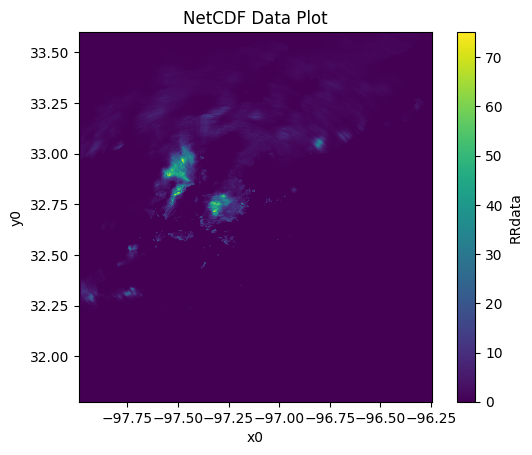

In [5]:
# Plot data
plt.imshow(rr_data[0, :, :], extent=(x_data[0], x_data[-1], y_data[0], y_data[-1]), origin="lower", cmap="viridis")
plt.colorbar(label="RRdata")
plt.title("NetCDF Data Plot")
plt.xlabel("x0")
plt.ylabel("y0")
plt.show()

In [9]:
# Check the coordinates of the data

# Get the minimum and maximum values of x and y
x_min = x_data[0]
x_max = x_data[-1]
y_min = y_data[0]
y_max = y_data[-1]

# Iterate through all the x and y coordinates
for x in x_data:
    for y in y_data:
        if x < x_min:
            x_min = x

        if x > x_max:
            x_max = x

        if y < y_min:
            y_min = y

        if y > y_max:
            y_max = y


print(f"Minimum x: {x_min} | Maximum x: {x_max}")
print(f"Minimum y: {y_min} | Maximum y: {y_max}")

Minimum x: -97.98999786376953 | Maximum x: -96.2449951171875
Minimum y: 31.774999618530273 | Maximum y: 33.599998474121094


# Cartopy + Matplotlib Map

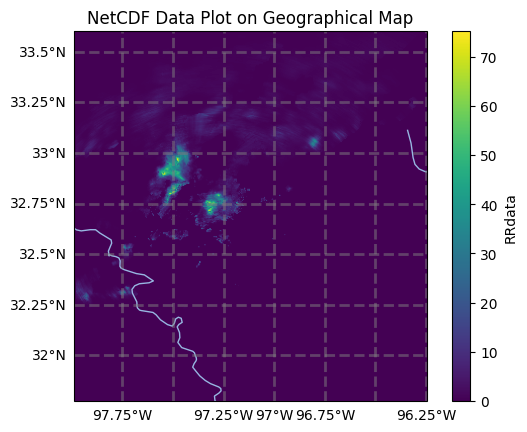

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree is a simple geographic projection
ax.set_extent([x_min, x_max, y_min, y_max])  # Set the extent to your min/max x and y values

# Add features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.imshow(
    rr_data[0, :, :],
    extent=(x_data[0], x_data[-1], y_data[0], y_data[-1]),
    origin="lower",
    cmap="viridis",
    transform=ccrs.PlateCarree(),
)

plt.colorbar(label="RRdata")
plt.title("NetCDF Data Plot on Geographical Map")
plt.show()

# Folium Map v.1


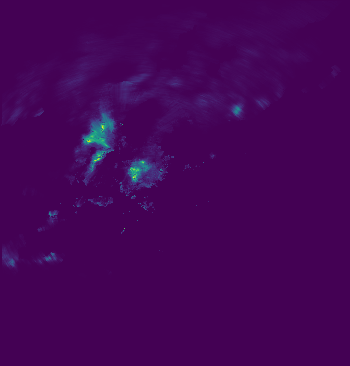

In [49]:
import folium
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Names
overlay_image_name = "overlay_image1.png"
html_filename = "NetCDF_Map1.html"

# Get the minimum and maximum values of x and y
x_min = float(x_data[0])
x_max = float(x_data[-1])
y_min = float(y_data[0])
y_max = float(y_data[-1])

# Calculate the center of the map
center_lat = (y_min + y_max) / 2
center_lon = (x_min + x_max) / 2

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)


def create_colored_overlay(data, filename=overlay_image_name):
    # Create a colormap
    cmap = plt.cm.viridis
    # Normalize the data
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    # Apply the colormap
    rgba_image = cmap(norm(data))
    # Flip the image vertically
    rgba_image = np.flipud(rgba_image)
    # Convert to 8-bit format
    rgba_image = (rgba_image * 255).astype(np.uint8)
    # Create PIL Image
    image = Image.fromarray(rgba_image, mode="RGBA")
    # Save the image
    image.save(os.path.join(NetCDFfromNAS_folder, filename))
    return os.path.join(NetCDFfromNAS_folder, filename)


# Create and save the overlay image
overlay_image_path = create_colored_overlay(rr_data[0, :, :])

# Add the overlay to the map
folium.raster_layers.ImageOverlay(
    image=overlay_image_path,
    bounds=[[y_min, x_min], [y_max, x_max]],
    opacity=0.6,
    interactive=True,
    cross_origin=False,
    zindex=1,
    legend_name="RRdata (mm/hr)",
).add_to(m)

m.add_child(folium.LatLngPopup())

# Save or display the map
m.save(os.path.join(NetCDFfromNAS_folder, html_filename))  # Save as an HTML file
m  # Display in a Jupyter notebook

# Folium Map v.2


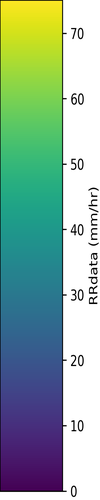
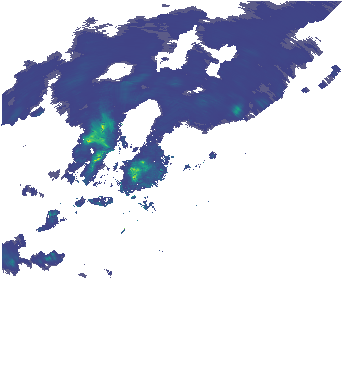

In [28]:
import folium
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.colors as mcolors
import os
from folium.plugins import FloatImage
import base64

# Names
overlay_image_name = "overlay_image2.png"
colorbar_filename = "colorbar.png"
html_filename = "NetCDF_Map2.html"


# Function to create and save a colorbar image
def create_colorbar(cmap, filename="colorbar.png", orientation="vertical"):
    fig, ax = plt.subplots(figsize=(1, 6)) if orientation == "vertical" else plt.subplots(figsize=(6, 1))
    norm = mcolors.Normalize(vmin=0, vmax=rr_data.max())
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation=orientation)
    # add label rr_data
    cb.set_label("RRdata (mm/hr)")
    fig.savefig(os.path.join(NetCDFfromNAS_folder, filename), dpi=300, bbox_inches="tight", pad_inches=0)
    plt.close(fig)
    return os.path.join(NetCDFfromNAS_folder, filename)


def resize_image(input_path, output_path, size=(100, 300)):
    with Image.open(input_path) as img:
        resized_img = img.resize(size, Image.Resampling.LANCZOS)
        resized_img.save(output_path)
        return output_path


def create_colored_overlay(data, filename=overlay_image_name):
    cmap = plt.cm.viridis
    colors = [(0, 0, 0, 0)] + [cmap(i) for i in range(50, 256)]
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("Custom_viridis", colors, N=256)
    norm = plt.Normalize(vmin=0, vmax=data.max())
    rgba_image = custom_cmap(norm(data))
    rgba_image = np.flipud(rgba_image)
    rgba_image = (rgba_image * 255).astype(np.uint8)
    image = Image.fromarray(rgba_image, mode="RGBA")
    image.save(os.path.join(NetCDFfromNAS_folder, filename))
    return os.path.join(NetCDFfromNAS_folder, filename)


# Get the minimum and maximum values of x and y
x_min = float(x_data[0])
x_max = float(x_data[-1])
y_min = float(y_data[0])
y_max = float(y_data[-1])

# Calculate the center of the map
center_lat = (y_min + y_max) / 2
center_lon = (x_min + x_max) / 2

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)

# Create and save the overlay image
overlay_image_path = create_colored_overlay(rr_data[0, :, :])

# Add the overlay to the map
folium.raster_layers.ImageOverlay(
    image=overlay_image_path,
    bounds=[[y_min, x_min], [y_max, x_max]],
    opacity=0.6,
    interactive=True,
    cross_origin=False,
    zindex=1,
).add_to(m)

# Create and save the colorbar image
custom_cmap = plt.cm.viridis
colorbar_path = create_colorbar(custom_cmap, colorbar_filename)
resized_path = resize_image(colorbar_path, os.path.join(NetCDFfromNAS_folder, "colorbar_resized.png"), size=(100, 500))

with open(resized_path, "rb") as colorbar_file:
    b64_content = base64.b64encode(colorbar_file.read()).decode("utf-8")

# encode and center the image on the right most side of the screen
encoded_colorbar = "data:image/png;base64,{}".format(b64_content)
FloatImage(encoded_colorbar, bottom=5, left=90).add_to(m)

# Additional map configurations
folium.LayerControl().add_to(m)
m.add_child(folium.LatLngPopup())

bbox = [[y_min, x_min], [y_max, x_max]]
folium.Rectangle(bounds=bbox, color="black", weight=2, fill=False).add_to(m)

# Save or display the map
m.save(os.path.join(NetCDFfromNAS_folder, html_filename))  # Save as an HTML file
m  # Display in a Jupyter notebook

# Convert to DataFrame

In [10]:
# Test conversion of NetCDF data into Pandas frame.

# Open the NetCDF file
with Dataset(local_path, "r") as nc_file:
    # Extract variable data
    rr_data = nc_file.variables["RRdata"][:]
    x_data = nc_file.variables["x0"][:]
    y_data = nc_file.variables["y0"][:]
    z_data = nc_file.variables["z0"][:]

# Create a multi-index DataFrame
df = pd.DataFrame(
    rr_data[0, :, :], index=pd.MultiIndex.from_product([z_data, y_data], names=["z", "y"]), columns=x_data
)

# Reset the index if needed
df.reset_index(inplace=True)

# Display the resulting DataFrame
print(df)

       z          y  -97.98999786376953  -97.98500061035156  \
0    0.5  31.775000                 0.0                 0.0   
1    0.5  31.779999                 0.0                 0.0   
2    0.5  31.785000                 0.0                 0.0   
3    0.5  31.789999                 0.0                 0.0   
4    0.5  31.795000                 0.0                 0.0   
..   ...        ...                 ...                 ...   
361  0.5  33.579998                 0.0                 0.0   
362  0.5  33.584999                 0.0                 0.0   
363  0.5  33.590000                 0.0                 0.0   
364  0.5  33.595001                 0.0                 0.0   
365  0.5  33.599998                 0.0                 0.0   

     -97.97999572753906  -97.9749984741211  -97.97000122070312  \
0                   0.0                0.0                 0.0   
1                   0.0                0.0                 0.0   
2                   0.0                0.0   